# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
In our dataset ; is used as a separator to seperate values in the csv file and also the data format is not correct so we parsed the date 

In [2]:
data_frame = pd.read_csv('/Users/srujithadevineni/Data_science/Assignment-1_Data.csv', sep=';')

/var/folders/gj/gyy0sxs96ns46ccr129t75_w0000gn/T/ipykernel_11595/4094114122.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv('/Users/srujithadevineni/Data_science/Assignment-1_Data.csv', sep=';')


# cleaning the dataset

### The top 5 rows and columns of the data


In [3]:
data_frame.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


### The last 5 rows and columns of the data.

In [4]:
data_frame.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,09.12.2011 12:50,"4,95",12680.0,France


###  No of rows and columns

In [5]:
data_frame.shape

(522064, 7)

In [6]:
print('Count of columns in the data is:  ', len(data_frame.columns))

Count of columns in the data is:   7


In [7]:
print('Count of rows in the data is:  ', len(data_frame))

Count of rows in the data is:   522064


### The names of the columns in dataset

In [8]:
data_frame.columns #gets the names of the columns in dataset


Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [9]:
print('length of data is',len(data_frame))#Gets the Length of the dataset

length of data is 522064


### The data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset


In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


### checking if there are any null values

In [11]:
np.sum(data_frame.isnull())

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

###  Fill missing values of 'CustomerID' values with 'Unknown'

In [12]:
data_frame['CustomerID'].fillna('Unknown', inplace=True)

###  Fill missing values of 'itemname' values with 'Unknown'

In [13]:
data_frame['Itemname'].fillna('Unknown', inplace=True)

In [14]:
np.sum(data_frame.isnull())

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [15]:
print('length of data after missing values is: ',len(data_frame))#Gets the Length of the dataset

length of data after missing values is:  522064


### Dropping data with negative or zero quantity

In [16]:
data_frame=data_frame.loc[data_frame['Quantity']>0]

### Dropping data with zero price

In [17]:
data_frame=data_frame.loc[data_frame['Price']>'0']

### Dropping Non-product data.

POSTAGE: This typically refers to the cost of shipping or mailing physical items, such as letters, parcels, or packages, via traditional postal services. It represents the fees associated with sending physical goods through mail or courier services.

DOTCOM POSTAGE: This term is more specific to online or e-commerce transactions. It often represents the charges for shipping items purchased through an online platform, website, or e-commerce store. It's a designation used to differentiate the postage fees specifically related to online sales or transactions from other types of postage costs.

Bad debts: In retail or commercial settings, when transactions remain unpaid for an extended period and are considered unrecoverable, the company might categorize them as bad debts. Adjusting or writing off such bad debts is a way to account for the loss in financial records and adjust the company's accounts accordingly for accurate financial reporting and tax purposes.

Manual: The entry 'Manual' in the dataset might represent a category used to describe manual transactions or sales that were not automatically recorded through a specific system or automated process. This entry could include transactions that were manually entered into the records for various reasons.


In [18]:
data_frame=data_frame.loc[(data_frame['Itemname']!='POSTAGE')&(data_frame['Itemname']!='DOTCOM POSTAGE')&(data_frame['Itemname']!='Adjust bad debt')&(data_frame['Itemname']!='Manual')]

### Extracting year-months from the 'Date' column

In [19]:
data_frame['Year']=data_frame['Date'].apply(lambda x:x.split('.')[2])
data_frame['Year']=data_frame['Year'].apply(lambda x:x.split(' ')[0])
data_frame['Month']=data_frame['Date'].apply(lambda x:x.split('.')[1])
data_frame.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom,2010,12
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom,2010,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12


In [20]:
data_frame['Year_Month'] = data_frame['Year'].astype(str) + '_' + data_frame['Month'].astype(str)

### Getting unique months in the dataset

In [21]:
unique_year_month = data_frame['Year_Month'].unique()
print(unique_year_month )

['2010_12' '2011_01' '2011_02' '2011_03' '2011_04' '2011_05' '2011_06'
 '2011_07' '2011_08' '2011_09' '2011_10' '2011_11' '2011_12']


### converting the price which is in string fomrat ie , in between to a int format by replacing with .

In [22]:
data_frame['Price']=data_frame['Price'].str.replace(',','.').astype('float64')
data_frame['Total price']=data_frame.Quantity*data_frame.Price
data_frame.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Year_Month,Total price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom,2010,12,2010_12,15.30
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,2010_12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom,2010,12,2010_12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,2010_12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,2010_12,20.34


### Checking the Total price in each month.

In [23]:
monthly_sales=data_frame.groupby(['Year','Month'])['Total price'].sum()
print(monthly_sales)

Year  Month
2010  12        778386.780
2011  01        648311.120
      02        490058.230
      03        659979.660
      04        507366.971
      05        721789.800
      06        710158.020
      07        642528.481
      08        701411.420
      09        981408.102
      10       1072317.070
      11       1421055.630
      12        606953.650
Name: Total price, dtype: float64


In [24]:
data_frame=data_frame.loc[data_frame['Year']!='2010']

### Plotting total sales trend over time

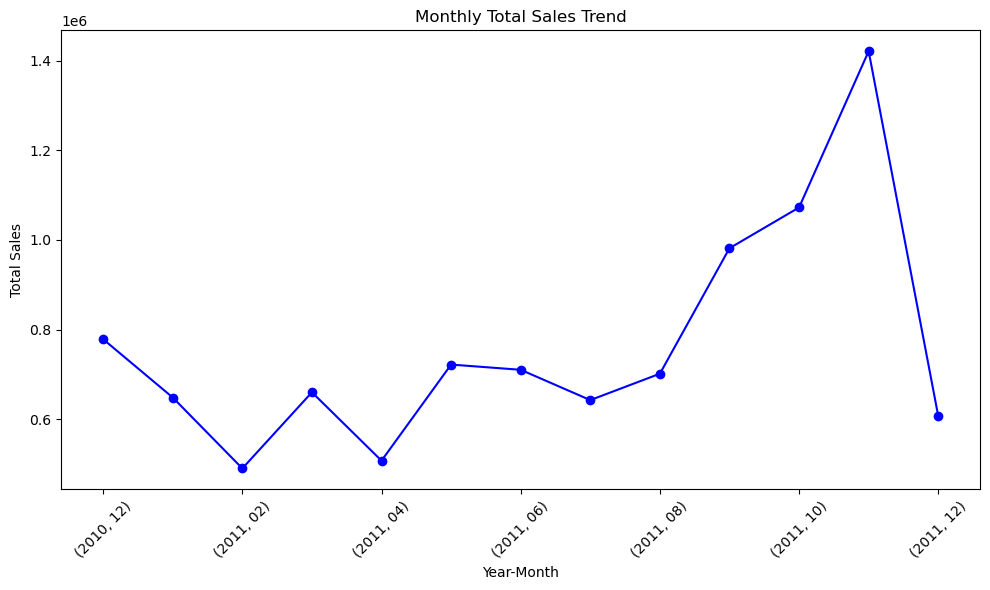

In [25]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Total Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
# plt.grid(True)
plt.tight_layout()
plt.show()

### plotting sales amount with quantity vs the year-month sales

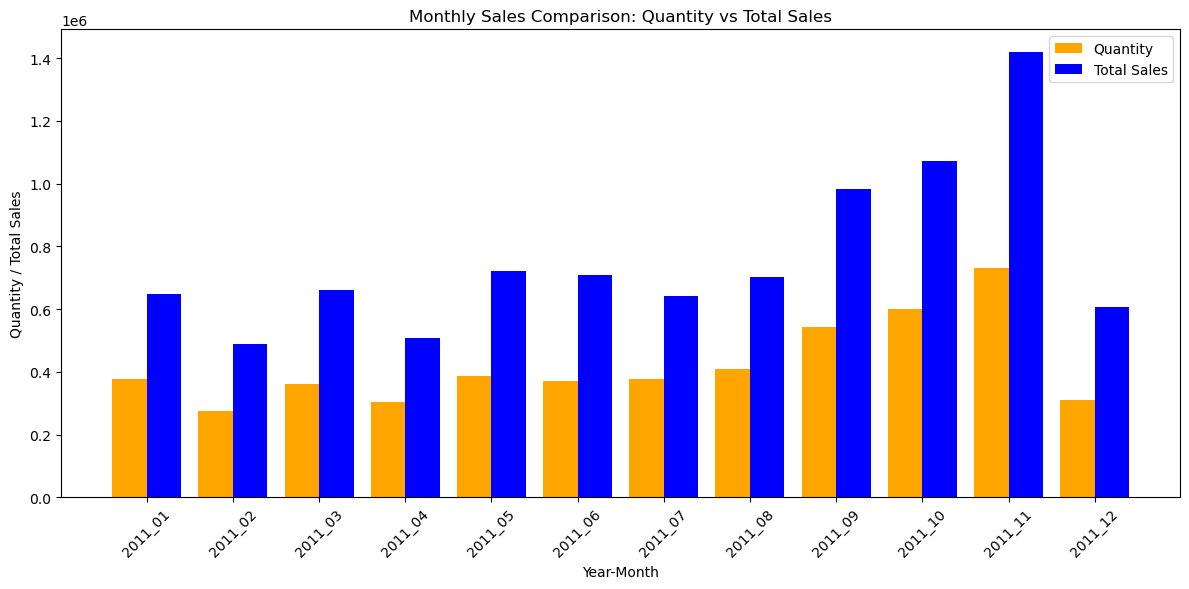

In [26]:
# Grouping data by Year_Month and aggregating Quantity and Total price
monthly_sales_data = data_frame.groupby('Year_Month').agg({'Quantity': 'sum', 'Total price': 'sum'}).reset_index()
bar_width = 0.4
index = np.arange(len(monthly_sales_data['Year_Month']))
plt.figure(figsize=(12, 6))
plt.bar(index, monthly_sales_data['Quantity'], width=bar_width, label='Quantity', color='orange')
plt.bar(index + bar_width, monthly_sales_data['Total price'], width=bar_width, label='Total Sales', color='blue')
plt.title('Monthly Sales Comparison: Quantity vs Total Sales')
plt.xlabel('Year-Month')
plt.ylabel('Quantity / Total Sales')
plt.xticks(index + bar_width / 2, monthly_sales_data['Year_Month'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### plotting sales amount vs the country

In [27]:
# Grouping data by Country and Year_Month and aggregating Total price
monthly_country_sales = data_frame.groupby(['Country', 'Year_Month'])['Total price'].sum().reset_index()

# Finding the country with the maximum sales for each month
max_sales_per_month = monthly_country_sales.loc[monthly_country_sales.groupby('Year_Month')['Total price'].idxmax()]

# Displaying the country with the most sales every month
print("Country with the most sales every month:")
print(max_sales_per_month[['Year_Month', 'Country', 'Total price']])


Country with the most sales every month:
    Year_Month         Country  Total price
196    2011_01  United Kingdom   547241.830
197    2011_02  United Kingdom   419050.620
198    2011_03  United Kingdom   573351.220
199    2011_04  United Kingdom   466318.821
200    2011_05  United Kingdom   619639.480
201    2011_06  United Kingdom   606395.970
202    2011_07  United Kingdom   578308.011
203    2011_08  United Kingdom   580150.260
204    2011_09  United Kingdom   878384.112
205    2011_10  United Kingdom   914957.970
206    2011_11  United Kingdom  1286504.780
207    2011_12  United Kingdom   572306.010


### performance of different countrys over the year for each month 

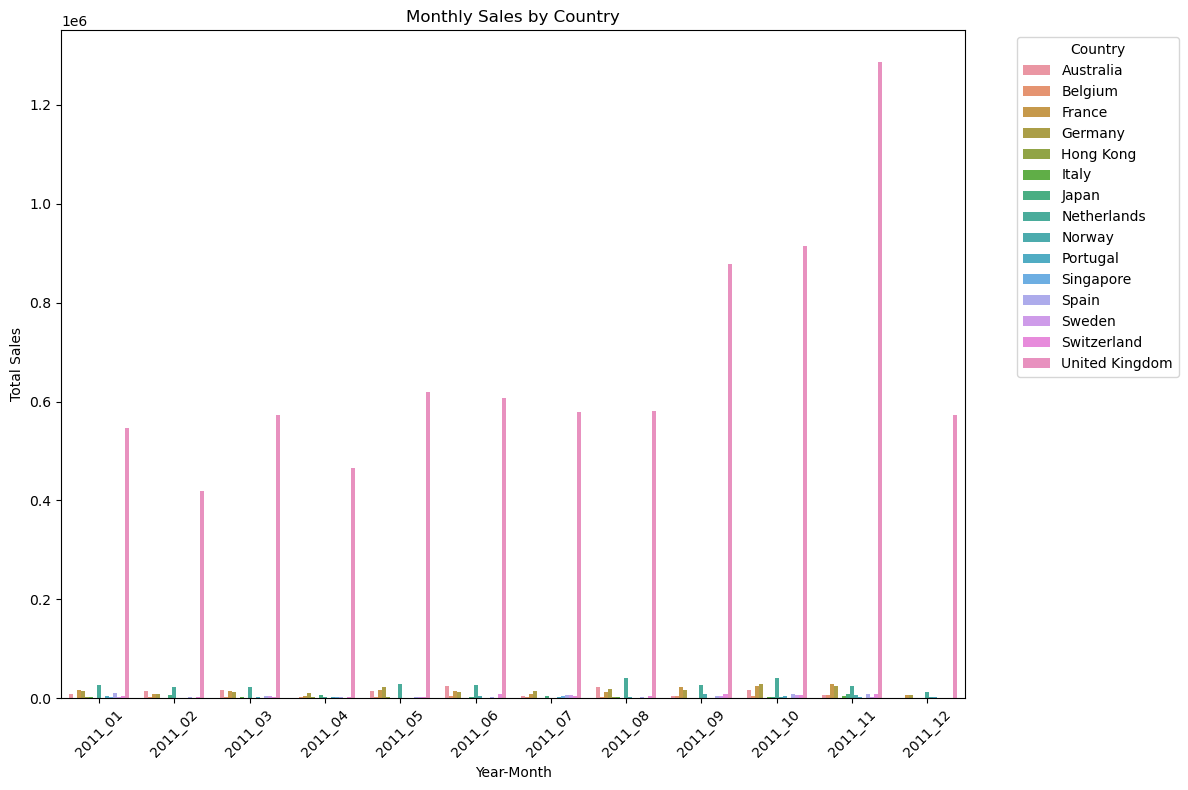

In [28]:
# Grouping data by Country and Year_Month and aggregating Total price
monthly_country_sales = data_frame.groupby(['Country', 'Year_Month'])['Total price'].sum().reset_index()

# Selecting the top N countries by total sales
top_countries = monthly_country_sales.groupby('Country')['Total price'].sum().nlargest(15).index

# Filtering data for the top N countries
top_countries_data = monthly_country_sales[monthly_country_sales['Country'].isin(top_countries)]

# Plotting monthly sales by country as a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Year_Month', y='Total price', hue='Country', data=top_countries_data)
plt.title('Monthly Sales by Country')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### sold item names with their total price

In [29]:
# Grouping data by Itemname and aggregating Total price
item_sales = data_frame.groupby('Itemname')['Total price'].sum().reset_index()
item_sales_sorted = item_sales.sort_values('Total price', ascending=False)
print("Sold Item Names with Total Price:")
print(item_sales_sorted)


Sold Item Names with Total Price:
                                Itemname  Total price
2302         PAPER CRAFT , LITTLE BIRDIE   168469.600
2747            REGENCY CAKESTAND 3 TIER   138351.430
2327                       PARTY BUNTING    96164.390
3719  WHITE HANGING HEART T-LIGHT HOLDER    91658.950
1743             JUMBO BAG RED RETROSPOT    89416.380
...                                  ...          ...
2638                         RAIN PONCHO        0.850
2425     PINK CRYSTAL GUITAR PHONE CHARM        0.850
2956     SET 12 COLOURING PENCILS DOILEY        0.650
1610           HEN HOUSE W CHICK IN NEST        0.420
2258          PADS TO MATCH ALL CUSHIONS        0.003

[3898 rows x 2 columns]


### top sales amount items 

In [30]:
item_sales_sorted.head()

,Itemname,Total price
2302,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2747,REGENCY CAKESTAND 3 TIER,138351.43
2327,PARTY BUNTING,96164.39
3719,WHITE HANGING HEART T-LIGHT HOLDER,91658.95
1743,JUMBO BAG RED RETROSPOT,89416.38


### least sales amount  items 

In [31]:
item_sales_sorted.tail()

,Itemname,Total price
2638,RAIN PONCHO,0.850
2425,PINK CRYSTAL GUITAR PHONE CHARM,0.850
2956,SET 12 COLOURING PENCILS DOILEY,0.650
1610,HEN HOUSE W CHICK IN NEST,0.420
2258,PADS TO MATCH ALL CUSHIONS,0.003


### Top 10 most purchased items¶

In [32]:
# Grouping the data by 'Itemname' and summing up the 'Quantity' for each item
item_quantity = data_frame.groupby('Itemname')['Quantity'].sum().reset_index()
top_10_purchased_items = item_quantity.sort_values(by='Quantity', ascending=False).head(10)
print("Top 10 Most Purchased Items:")
print(top_10_purchased_items)


Top 10 Most Purchased Items:
                                Itemname  Quantity
2302         PAPER CRAFT , LITTLE BIRDIE     80995
1972      MEDIUM CERAMIC TOP STORAGE JAR     77553
3809   WORLD WAR 2 GLIDERS ASSTD DESIGNS     48604
1743             JUMBO BAG RED RETROSPOT     45857
2580                      POPCORN HOLDER     35601
211        ASSORTED COLOUR BIRD ORNAMENT     33738
3719  WHITE HANGING HEART T-LIGHT HOLDER     32765
2637                  RABBIT NIGHT LIGHT     30518
2252     PACK OF 72 RETROSPOT CAKE CASES     30369
219            ASSORTED COLOURS SILK FAN     23605


#### removing lines where item name is missing

In [33]:
data_frame=data_frame[data_frame['Itemname'].notna()]
print("Number of unique items:",data_frame ['Itemname'].nunique())

Number of unique items: 3898


# 

#### Based on our analysis, the year 2011 showcased the United Kingdom as the top-performing region in sales. To delve deeper, let's explore the combinations of items frequently purchased in the UK

#              Frequent Itemset Mining


Frequent Itemset Mining involves identifying combinations of items that frequently occur together within a dataset. Consider a toy box with cars, dolls, blocks, and more. Sometimes, cars and race tracks are frequently seen together during playtime. These common combinations are termed "frequent itemsets" - groups of items that regularly appear together.

Discovering these item groups allows us to comprehend consumer preferences or usage patterns. For instance, knowing that customers often purchase chips and soda together in a store helps optimize product placement and aids in understanding customer preferences.

### Key Concepts of Itemset Mining



##### Minimum Threshold:
The minimum threshold, often called the support threshold, determines the minimum occurrence frequency required for an itemset to be considered frequent. It's set to filter out itemsets that occur less frequently than the threshold. Adjusting this threshold impacts the number and significance of discovered itemsets in the mining process.


##### Association Rules: 
Association Rules are used to find relationships between itemsets. For example, the first association rule can be read as- “If a person buys milk and bread, then they will also buy butter”.

##### Antecedent: 
The antecedent is the itemset that comes in the ‘If’ part of the association rule. In the first association rule, the antecedent is Milk and Bread.

##### Consequent:
The consequent is the itemset that comes in the ‘Then’ part of the association rule. In the first association rule, the consequent is Butter.

##### support:
Support in frequent itemset mining indicates the frequency or occurrence of an itemset in a dataset. It's calculated as the ratio of the number of transactions where the itemset appears to the total number of transactions. Higher support values signify that the itemset appears frequently in the dataset. It helps in identifying the most common itemsets or combinations of items in a dataset.

Support(X)= support(X)/Total_Transactions(N)
 

##### Confidence:
Confidence in association rules measures the likelihood that if item A is purchased, item B will also be purchased. It's calculated as the ratio of the support for both items together to the support of item A alone. High confidence implies a strong association between items.

Confidence(X→Y)= Support(X)/Support(X∪Y)

##### lift: 
Represents the ratio of observed support to the expected support if the antecedent and consequent were independent.
Lift = Confidence (antecedent -> consequent) / Support(antecedent)

##### leverage:
Indicates the difference between the observed frequency of antecedent and consequent appearing together and the frequency that would be expected if they were independent.

##### conviction: 
Calculates the dependency of the consequent on the antecedent.

##### zhangs_metric:
This might represent a specific measure or metric related to association rule mining, but without further context, it's difficult to provide specific details about it.


##### Application Areas of Frequent Itemset Mining are
Supermarkets: Helps optimize product placement for increased sales.
Online Shopping: Recommends products based on customers' buying patterns.
Healthcare: Identifies frequent co-occurrences of symptoms in patients for better diagnosis.


### The two most commonly used algorithms for Frequent Itemset Mining are apriori and fp-growth.

#### Apriori Algorithm:

Step 1: Candidate Itemset Generation: Initially identifies frequent individual items (1-itemsets) in the dataset.    
Step 2: Joining and Pruning: Generates larger candidate itemsets by joining smaller frequent itemsets and pruning infrequent ones based on a minimum support threshold.   
Step 3: Repeats: Iteratively applies the join and prune steps to generate larger itemsets until no more can be formed.   

##### Advantages:      
Easy to understand and implement.
Guarantees to find all frequent itemsets.
Works well for small or medium-sized datasets.

##### Disadvantages:      
Computationally expensive for large datasets due to multiple scans of the data.
Generates a vast number of candidate itemsets, leading to higher memory requirements.


#### FP-Growth Algorithm:    
Utilizes a tree-like structure called the FP-Tree to encode the dataset efficiently.

Step 1: FP-Tree Construction: Builds an FP-Tree by encoding transactions and their itemsets.     
Step 2: Mining Frequent Itemsets: Condenses the FP-Tree and recursively mines frequent itemsets from its structure.    

##### Advantages:     
Requires only two scans of the dataset, making it faster than Apriori.     
Consumes less memory as it compresses the dataset into a tree structure.     
Efficient for large datasets and high-dimensional data.

##### Disadvantages:    
More complex to understand and implement than Apriori.
Can be less efficient for datasets with very low support thresholds or extremely dense datasets.
Both algorithms are significant in discovering frequent itemsets, but FP-Growth tends to outperform Apriori for larger datasets due to its reduced number of scans and memory usage. 

#### installing libraries
the mlxtend library in Python, which provides implementations for various machine learning algorithms, including Apriori. First, you need to install the library if you haven't already:

#### the following code filters the DataFrame based on items and bill numbers such that it retains only rows where both the item names and bill numbers occur more than once in the original dataset. This filtering operation helps focus the analysis on items and transactions that have multiple occurrences.

In [34]:
df=data_frame
# Filterring rows based on item occurrences
item_counts = df['Itemname'].value_counts(ascending=False)
filtered_items = item_counts.loc[item_counts > 1].reset_index()['index']
df = df[df['Itemname'].isin(filtered_items)]

# Filter rows based on bill number occurrences
bill_counts = df['BillNo'].value_counts(ascending=False)
filtered_bills = bill_counts.loc[bill_counts > 1].reset_index()['index']
df = df[df['BillNo'].isin(filtered_bills)]

We creates a pivot table from the filtered DataFrame where each row represents a unique transaction ('BillNo'), each column represents an item ('Itemname'), and the presence of an item in a transaction is marked as True, while the absence is marked as False. This pivot table will help in performing association rule mining or analyzing item co-occurrences in transactions.

In [35]:
pivot_table = pd.pivot_table(df[['BillNo','Itemname']], index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)
pivot_table

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
539993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
540001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
540002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
540003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
540005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
572054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
572055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# pip install mlxtend

In [37]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Generating frequent iteemset 

In [38]:
frequent_itemsets = apriori(pivot_table, min_support=0.01,use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
       support                                           itemsets
0     0.016680                           (10 COLOUR SPACEBOY PEN)
1     0.013054                  (12 MESSAGE CARDS WITH ENVELOPES)
2     0.018795                    (12 PENCIL SMALL TUBE WOODLAND)
3     0.018070              (12 PENCILS SMALL TUBE RED RETROSPOT)
4     0.018614                      (12 PENCILS SMALL TUBE SKULL)
...        ...                                                ...
2455  0.010757  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
2456  0.010576  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...
2457  0.010153  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
2458  0.011120  (WOODLAND CHARLOTTE BAG, CHARLOTTE BAG PINK PO...
2459  0.010213  (JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SU...

[2460 rows x 2 columns]


## Generating association rules

In [39]:
rules = association_rules(frequent_itemsets, "confidence", min_threshold = 0.5)
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 GIFT TAGS 50'S CHRISTMAS),(ROLL WRAP 50'S CHRISTMAS),0.019097,0.021152,0.010092,0.528481,24.985072,0.009689,2.075946,0.978666
1,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.023267,0.071433,0.013114,0.563636,7.890432,0.011452,2.127966,0.894067
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.044358,0.071433,0.023811,0.536785,7.514532,0.020642,2.004613,0.907165
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.023086,0.052154,0.014806,0.641361,12.297340,0.013602,2.642898,0.940391
4,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.023086,0.056929,0.015532,0.672775,11.817841,0.014217,2.882026,0.937014
...,...,...,...,...,...,...,...,...,...,...
1485,"(JUMBO BAG PINK POLKADOT, JUMBO BAG WOODLAND A...","(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)",0.014988,0.041397,0.010213,0.681452,16.461284,0.009593,3.009285,0.953543
1486,"(JUMBO BAG PINK POLKADOT, JUMBO BAG WOODLAND A...","(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",0.019762,0.030036,0.010213,0.516820,17.206868,0.009620,2.007458,0.960872
1487,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...","(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",0.015713,0.047078,0.010213,0.650000,13.806868,0.009474,2.722634,0.942380
1488,"(JUMBO BAG WOODLAND ANIMALS, JUMBO BAG RED RET...","(JUMBO BAG PINK POLKADOT, JUMBO SHOPPER VINTAG...",0.018916,0.027558,0.010213,0.539936,19.592813,0.009692,2.113711,0.967257


### The top 5 of the highest support value of items(antecedents)

In [55]:
sorted_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
top_7_itemsets = sorted_itemsets.head(7)
print(top_7_itemsets)

      support                              itemsets
838  0.118269  (WHITE HANGING HEART T-LIGHT HOLDER)
372  0.116577             (JUMBO BAG RED RETROSPOT)
592  0.103765            (REGENCY CAKESTAND 3 TIER)
494  0.096271                       (PARTY BUNTING)
413  0.087992             (LUNCH BAG RED RETROSPOT)
54   0.080317       (ASSORTED COLOUR BIRD ORNAMENT)
667  0.077416    (SET OF 3 CAKE TINS PANTRY DESIGN)


### The top 5 of the highest confidence value of items

In [56]:
sorted_rules_by_confidence = rules.sort_values(by='confidence', ascending=False)
top_10_rules_by_confidence = sorted_rules_by_confidence.head(10)
print(top_5_rules_by_confidence)

                                            antecedents  \
1203  (HERB MARKER MINT, HERB MARKER BASIL, HERB MAR...   
1231  (HERB MARKER PARSLEY, HERB MARKER MINT, HERB M...   
1217  (HERB MARKER PARSLEY, HERB MARKER BASIL, HERB ...   
547               (HERB MARKER MINT, HERB MARKER THYME)   
523             (HERB MARKER CHIVES, HERB MARKER THYME)   

                 consequents  antecedent support  consequent support  \
1203  (HERB MARKER ROSEMARY)            0.010334            0.013114   
1231  (HERB MARKER ROSEMARY)            0.010636            0.013114   
1217  (HERB MARKER ROSEMARY)            0.010455            0.013114   
547   (HERB MARKER ROSEMARY)            0.011362            0.013114   
523    (HERB MARKER PARSLEY)            0.010455            0.012933   

       support  confidence       lift  leverage  conviction  zhangs_metric  
1203  0.010092    0.976608  74.469750  0.009957   42.189370       0.996874  
1231  0.010334    0.971591  74.087165  0.010195   34.73838

### The top 5 of the highest lift value of items

In [57]:
sorted_rules_by_lift = rules.sort_values(by='lift', ascending=False)
top_10_rules_by_lift = sorted_rules_by_lift.head(10)
print(top_10_rules_by_lift)

                                      antecedents  \
1237        (HERB MARKER MINT, HERB MARKER THYME)   
1232  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)   
1208        (HERB MARKER MINT, HERB MARKER THYME)   
1205    (HERB MARKER ROSEMARY, HERB MARKER BASIL)   
1234     (HERB MARKER ROSEMARY, HERB MARKER MINT)   
1235     (HERB MARKER PARSLEY, HERB MARKER THYME)   
1223       (HERB MARKER BASIL, HERB MARKER THYME)   
1218  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)   
1219    (HERB MARKER ROSEMARY, HERB MARKER BASIL)   
1222     (HERB MARKER PARSLEY, HERB MARKER THYME)   

                                      consequents  antecedent support  \
1237  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)            0.011362   
1232        (HERB MARKER MINT, HERB MARKER THYME)            0.011785   
1208    (HERB MARKER ROSEMARY, HERB MARKER BASIL)            0.011362   
1205        (HERB MARKER MINT, HERB MARKER THYME)            0.011603   
1234     (HERB MARKER PARSLEY, HERB MARKER THYME)  

# 

# fp-growth

In [63]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

## Generating frequent iteemset 

In [71]:
frequent_itemsets_fp= fpgrowth(pivot_table, min_support=0.01,use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets_fp)

Frequent Itemsets:
       support                                           itemsets
0     0.118269               (WHITE HANGING HEART T-LIGHT HOLDER)
1     0.116577                          (JUMBO BAG RED RETROSPOT)
2     0.069680                          (JUMBO BAG PINK POLKADOT)
3     0.058984                           (JAM MAKING SET PRINTED)
4     0.041337                          (RECYCLING BAG RETROSPOT)
...        ...                                                ...
2455  0.010455  (JUMBO BAG VINTAGE DOILY, JUMBO BAG RED RETROS...
2456  0.013054  (HAND WARMER OWL DESIGN, HAND WARMER RED LOVE ...
2457  0.011905  (HAND WARMER SCOTTY DOG DESIGN, HAND WARMER RE...
2458  0.010213  (HAND WARMER BIRD DESIGN, HAND WARMER RED LOVE...
2459  0.010334  (ROLL WRAP 50'S CHRISTMAS, ROLL WRAP 50'S RED ...

[2460 rows x 2 columns]


In [74]:
rules_fp = association_rules(frequent_itemsets_fp, "confidence", min_threshold = 0.5)
print("\nAssociation Rules:")
rules_fp


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.069680,0.116577,0.047078,0.675629,5.795557,0.038955,2.723494,0.889430
1,"(JUMBO BAG PINK POLKADOT, WHITE HANGING HEART ...",(JUMBO BAG RED RETROSPOT),0.014504,0.116577,0.010213,0.704167,6.040356,0.008522,2.986219,0.846728
2,"(LUNCH BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",(JUMBO BAG RED RETROSPOT),0.018191,0.116577,0.013960,0.767442,6.583131,0.011840,3.798719,0.863810
3,"(JUMBO BAG PINK POLKADOT, LUNCH BAG BLACK SKU...",(JUMBO BAG RED RETROSPOT),0.014867,0.116577,0.010455,0.703252,6.032510,0.008722,2.977014,0.846821
4,"(SET OF 3 CAKE TINS PANTRY DESIGN, JAM MAKING ...",(JAM MAKING SET PRINTED),0.021333,0.058984,0.011543,0.541076,9.173353,0.010285,2.050487,0.910411
...,...,...,...,...,...,...,...,...,...,...
1485,(JUMBO BAG VINTAGE DOILY),(JUMBO BAG RED RETROSPOT),0.042122,0.116577,0.021152,0.502152,4.307470,0.016241,1.774484,0.801611
1486,"(JUMBO BAG VINTAGE DOILY, JUMBO BAG VINTAGE LEAF)",(JUMBO BAG RED RETROSPOT),0.016619,0.116577,0.010455,0.629091,5.396354,0.008518,2.381778,0.828458
1487,(HAND WARMER RED LOVE HEART),(HAND WARMER OWL DESIGN),0.023811,0.034568,0.013054,0.548223,15.859181,0.012231,2.136967,0.959799
1488,(HAND WARMER RED LOVE HEART),(HAND WARMER SCOTTY DOG DESIGN),0.023811,0.028162,0.011905,0.500000,17.754292,0.011235,1.943676,0.966693


In [75]:
sorted_itemsets_fp= frequent_itemsets_fp.sort_values(by='support', ascending=False)
top_7_itemsets_fp = sorted_itemsets_fp.head(7)
print(top_7_itemsets_fp)

      support                              itemsets
0    0.118269  (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.116577             (JUMBO BAG RED RETROSPOT)
72   0.103765            (REGENCY CAKESTAND 3 TIER)
161  0.096271                       (PARTY BUNTING)
94   0.087992             (LUNCH BAG RED RETROSPOT)
95   0.080317       (ASSORTED COLOUR BIRD ORNAMENT)
23   0.077416    (SET OF 3 CAKE TINS PANTRY DESIGN)


In [76]:
sorted_rules_by_confidence_fp = rules_fp.sort_values(by='confidence', ascending=False)
top_10_rules_by_confidence_fp = sorted_rules_by_confidence.head(10)
print(top_5_rules_by_confidence)

                                            antecedents  \
1203  (HERB MARKER MINT, HERB MARKER BASIL, HERB MAR...   
1231  (HERB MARKER PARSLEY, HERB MARKER MINT, HERB M...   
1217  (HERB MARKER PARSLEY, HERB MARKER BASIL, HERB ...   
547               (HERB MARKER MINT, HERB MARKER THYME)   
523             (HERB MARKER CHIVES, HERB MARKER THYME)   

                 consequents  antecedent support  consequent support  \
1203  (HERB MARKER ROSEMARY)            0.010334            0.013114   
1231  (HERB MARKER ROSEMARY)            0.010636            0.013114   
1217  (HERB MARKER ROSEMARY)            0.010455            0.013114   
547   (HERB MARKER ROSEMARY)            0.011362            0.013114   
523    (HERB MARKER PARSLEY)            0.010455            0.012933   

       support  confidence       lift  leverage  conviction  zhangs_metric  
1203  0.010092    0.976608  74.469750  0.009957   42.189370       0.996874  
1231  0.010334    0.971591  74.087165  0.010195   34.73838

In [77]:
sorted_rules_by_lift_fp = rules_fp.sort_values(by='lift', ascending=False)
top_10_rules_by_lift_fp = sorted_rules_by_lift.head(10)
print(top_10_rules_by_lift_fp)

                                     antecedents  \
955        (HERB MARKER MINT, HERB MARKER THYME)   
950  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)   
968        (HERB MARKER MINT, HERB MARKER THYME)   
965    (HERB MARKER ROSEMARY, HERB MARKER BASIL)   
953     (HERB MARKER PARSLEY, HERB MARKER THYME)   
952     (HERB MARKER ROSEMARY, HERB MARKER MINT)   
918  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)   
923       (HERB MARKER BASIL, HERB MARKER THYME)   
922     (HERB MARKER PARSLEY, HERB MARKER THYME)   
919    (HERB MARKER ROSEMARY, HERB MARKER BASIL)   

                                     consequents  antecedent support  \
955  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)            0.011362   
950        (HERB MARKER MINT, HERB MARKER THYME)            0.011785   
968    (HERB MARKER ROSEMARY, HERB MARKER BASIL)            0.011362   
965        (HERB MARKER MINT, HERB MARKER THYME)            0.011603   
953     (HERB MARKER ROSEMARY, HERB MARKER MINT)            0.01160

### The best combination of the items

In [78]:
sorted_rules_by_lift_fp = rules_fp.sort_values(by='lift', ascending=False)
best_combination_by_lift_fp = sorted_rules_by_lift.head(1)
print(best_combination_by_lift_fp)

                               antecedents  \
955  (HERB MARKER MINT, HERB MARKER THYME)   

                                     consequents  antecedent support  \
955  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)            0.011362   

     consequent support   support  confidence       lift  leverage  \
955            0.011785  0.010334    0.909574  77.183224    0.0102   

     conviction  zhangs_metric  
955     10.9285       0.998387  


Apriori and FP-Growth are two popular algorithms used to mine frequent itemsets in association rule learning, From the abaove we can see that Both algorithms aim to identify patterns of co-occurring items in datasets. However, FP-Growth has several advantages over Apriori in terms of efficiency and performance.

FP-Growth stands out for its efficiency in handling large datasets compared to Apriori. Unlike Apriori, FP-Growth doesn't require multiple scans of the dataset, reducing the computational burden significantly, especially when dealing with massive transactional data. 

Moreover, FP-Growth utilizes a tree structure (FP-tree) to encode the dataset, compressing the information and enabling faster mining of frequent itemsets. This tree-based approach allows for quicker pattern discovery by bypassing the generation of candidate itemsets, which is a major step in Apriori and can be computationally expensive.

The advantages of FP-Growth, such as its ability to efficiently handle large datasets and expedite the mining process by utilizing a compact data structure, make it particularly advantageous in scenarios where scalability and computational efficiency are crucial for discovering frequent itemsets.

#

# Conclusion

Based on the frequent itemsets generated from the association analysis , we've observed several noteworthy associations among these items. Combinations such as (HERB MARKER MINT, HERB MARKER THYME), (HERB MARKER ROSEMARY, HERB MARKER PARSLEY), and (HERB MARKER ROSEMARY, HERB MARKER BASIL) are consistently occurring together more frequently than others in our sales records. This indicates a strong correlation and customer preference for these specific pairs of herb markers. These associations present valuable insights into customer behavior and preferences, suggesting potential bundling opportunities or strategic product placements. Leveraging these findings can empower us to design targeted marketing campaigns or create bundled offers, effectively catering to customer preferences and enhancing sales prospects.

### ->The most purchaed item is paper craft,little Birdie.
### ->The most frequently purchased item is white hanging heart t-light holder .
### ->The best combination of items bought are :
#### (HERB MARKER MINT, HERB MARKER THYME), 
#### (HERB MARKER ROSEMARY, HERB MARKER PARSLEY),and 
#### (HERB MARKER ROSEMARY, HERB MARKER BASIL) 
